In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import linear_model, metrics

In [2]:
data = pd.read_csv('./data/all_and_classification.csv')  # load data set
data = data.drop('file_name', axis=1)
data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)


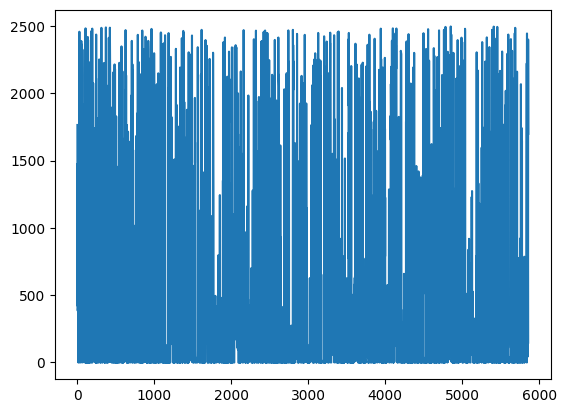

In [41]:
ax = data['steady_state_starts'].plot()

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts
count,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,...,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5.219000e+03,5219.000000
mean,4.018425e-01,2.994490e-01,3.051423e-01,2.890322e-01,2.884165e-01,2.816810e-01,2.886073e-01,2.873358e-01,2.856900e-01,2.824899e-01,...,2.812317e-01,2.706402e-01,2.645620e-01,2.720537e-01,2.726118e-01,2.702777e-01,2.676275e-01,2.678171e-01,2.745130e-01,388.204062
std,1.681312e+00,1.432261e+00,1.567145e+00,1.439768e+00,1.446128e+00,1.417174e+00,1.438246e+00,1.472499e+00,1.437947e+00,1.420508e+00,...,1.508096e+00,1.383847e+00,1.332807e+00,1.392757e+00,1.393100e+00,1.377329e+00,1.357020e+00,1.359469e+00,1.418902e+00,668.668688
min,3.473333e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,...,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,2.000000e-09,0.000000
25%,2.399731e-06,6.187494e-07,4.840219e-07,4.714874e-07,4.575839e-07,4.316306e-07,4.196649e-07,4.050134e-07,4.047062e-07,3.981725e-07,...,3.066419e-07,3.095082e-07,3.103955e-07,3.071102e-07,3.065023e-07,3.131790e-07,3.105376e-07,3.061157e-07,3.050098e-07,1.000000
50%,1.821192e-04,6.742638e-05,4.278408e-05,3.476635e-05,3.163280e-05,3.041167e-05,2.882877e-05,2.595442e-05,2.578813e-05,2.368173e-05,...,1.899333e-05,1.904057e-05,1.897162e-05,1.883356e-05,1.884534e-05,1.882958e-05,1.876486e-05,1.893652e-05,1.889167e-05,37.000000
75%,1.188823e-01,8.503637e-03,6.763861e-03,6.756489e-03,6.800452e-03,6.161348e-03,5.404888e-03,5.634503e-03,5.625856e-03,5.781959e-03,...,4.829964e-03,4.848460e-03,4.824893e-03,4.869949e-03,4.882172e-03,4.854540e-03,4.927586e-03,4.953234e-03,4.867218e-03,394.500000
max,2.016621e+01,1.546859e+01,2.731331e+01,2.855482e+01,1.949512e+01,2.623957e+01,1.775029e+01,2.170972e+01,2.164261e+01,2.033399e+01,...,1.915958e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.499883e+01,1.501561e+01,1.499883e+01,1.499883e+01,2497.000000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.12691364, -0.15646875, -0.14768035, ..., -0.14099814,
        -0.1393036 ,  2.05920792],
       [-0.12706957, -0.15610266, -0.14797311, ..., -0.14302303,
        -0.14161321,  0.1372948 ],
       [-0.12582212, -0.15660603, -0.1485168 , ..., -0.14263733,
        -0.14096652,  0.04905132],
       ...,
       [-0.23783785, -0.20717215, -0.19402975, ..., -0.19611296,
        -0.19182457, -0.37122696],
       [-0.23805503, -0.20730303, -0.19292644, ..., -0.19620078,
        -0.19272032,  3.00894709],
       [-0.23804896, -0.20724889, -0.19293958, ..., -0.19619974,
        -0.19271963,  1.96049487]])

In [18]:
df_scaled = pd.DataFrame(data_scaled)

In [24]:
x_data = df_scaled.iloc[:, : 2999]
print(x_data)
y_data = df_scaled[3000]
print(y_data)

          0         1         2         3         4         5         6     \
0    -0.126914 -0.156469 -0.147680 -0.150102 -0.149242 -0.145734 -0.126131   
1    -0.127070 -0.156103 -0.147973 -0.149828 -0.148880 -0.146243 -0.128000   
2    -0.125822 -0.156606 -0.148517 -0.150602 -0.148925 -0.146891 -0.121437   
3    -0.125666 -0.161617 -0.147764 -0.149783 -0.148744 -0.145688 -0.126860   
4    -0.128473 -0.156789 -0.148684 -0.150102 -0.149106 -0.146382 -0.128000   
...        ...       ...       ...       ...       ...       ...       ...   
5214 -0.237806 -0.207360 -0.194030 -0.199951 -0.197888 -0.196830 -0.198769   
5215 -0.238041 -0.207281 -0.192896 -0.198845 -0.197500 -0.196831 -0.198802   
5216 -0.237838 -0.207172 -0.194030 -0.199957 -0.197860 -0.196817 -0.198752   
5217 -0.238055 -0.207303 -0.192926 -0.198829 -0.197555 -0.196834 -0.198896   
5218 -0.238049 -0.207249 -0.192940 -0.198850 -0.197550 -0.196838 -0.198335   

          7         8         9     ...      2989      2990    

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state=1)

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print(y_pred)
print(y_test)

                 0
0    -1.584217e+06
1    -4.192287e-01
2    -2.711791e+02
3     5.416042e+05
4     3.427515e+00
...            ...
1561  1.376143e+03
1562  1.783569e+04
1563 -6.483957e+04
1564  2.183783e+00
1565 -4.068341e+01

[1566 rows x 1 columns]
28     -0.580618
2146   -0.579123
1494    1.909643
1749   -0.580618
3826   -0.580618
          ...   
2837    0.955417
938     0.967382
2768   -0.105001
4251   -0.381697
3477   -0.190253
Name: 3000, Length: 1566, dtype: float64


In [39]:
# y_test.rename(columns = {'':'test'},
#             inplace = True)
y_test = pd.DataFrame(y_test)
y_test

,3000
28,-0.580618
2146,-0.579123
1494,1.909643
1749,-0.580618
3826,-0.580618
...,...
2837,0.955417
938,0.967382
2768,-0.105001
4251,-0.381697


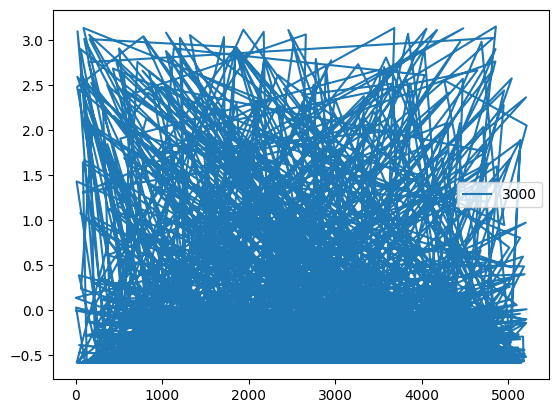

In [40]:
ax = y_test.plot()


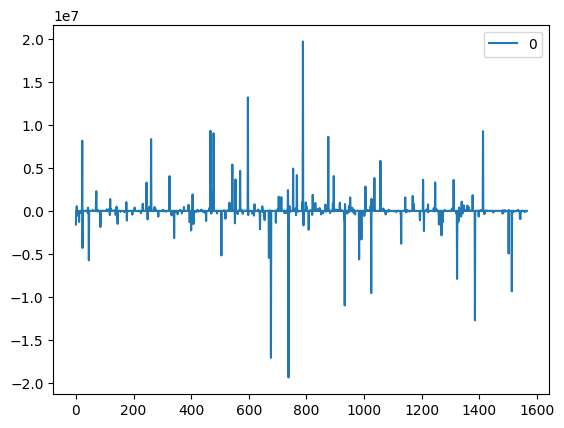

In [42]:
ax = y_pred.plot()

In [28]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))


Coefficients:  [-2.42936189e+00 -1.94934884e+04 -1.33261833e+01 ... -1.53184809e+06
 -8.72855559e+05  2.27044369e+06]
Variance score: -1904483881879.2778
Mean squared error: 1794229562566.51
Coefficient of determination: -1904483881879.28


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 254148.41096997622
MSE: 1794229562566.5132
RMSE: 1339488.5451419558


In [ ]:
1339488.5451419558
892009233.0987793